# Analyzing Metric on Different Models

We evaluated the performance of Gemma, Gemma2, Phi-mini3, and Llama3 in extracting humorous quotes from transcripts. Among these models, Gemma2 achieved the highest overall performance with a score of 33.3%, followed closely by Llama3 with a score of 31.5%. Phi-mini3 exhibited the lowest performance, with an average score of 27%. Notably, Llama3 attained the highest score for an individual comedian's transcript, surpassing 70%.

#### Imports

In [6]:
import sys
import pandas as pd
sys.path.append("..")
import seaborn as sns
import nltk
from thefuzz import fuzz
import matplotlib.pyplot as plt

from humor.bipartite_metric import bipartite_metric

In [8]:
ground_truth = pd.read_csv('/home/ada/humor/data/stand_up_dataset/standup_data.csv')
gemma = pd.read_csv('/home/ada/humor/data/stand_up_dataset/gemma_answers.csv')
phi_model = pd.read_csv("/home/ada/humor/data/stand_up_dataset/phi3_mini_quotes.csv")
gemma2 = pd.read_csv("/home/ada/humor/data/stand_up_dataset/gemma2 - gemma2.csv")
llama = pd.read_csv("/home/ada/humor/data/stand_up_dataset/llama - llama.csv")

#### Experiment

In [9]:
gemma_metric = bipartite_metric(gemma, ground_truth)
print("Gemma Model:", gemma_metric.select_dtypes(include='number').mean())

phi_metric = bipartite_metric(phi_model, ground_truth)
print("Phi Model:", phi_metric.select_dtypes(include='number').mean())

gemma2_metric = bipartite_metric(gemma2, ground_truth)
print("Gemma2 Model:", gemma2_metric.select_dtypes(include='number').mean())

llama_metric = bipartite_metric(llama, ground_truth)
print("Llama Model:",llama_metric.select_dtypes(include='number').mean())

Gemma Model: score    30.08505
dtype: float64
Phi Model: score    26.455392
dtype: float64
Gemma2 Model: score    34.891259
dtype: float64
Llama Model: score    31.878605
dtype: float64


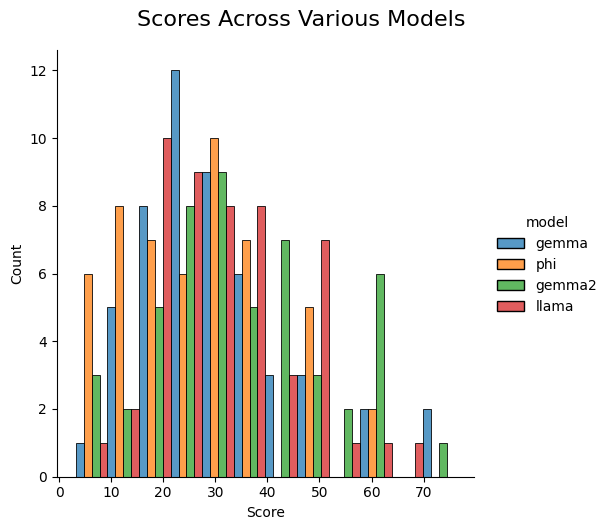

In [10]:
gemma = gemma_metric.assign(model="gemma")
phi = phi_metric.assign(model="phi")
gemma2 = gemma2_metric.assign(model = "gemma2")
llama = llama_metric.assign(model = "llama")

df = pd.concat([gemma, phi, gemma2, llama]).reset_index(drop=True)
plot = sns.displot(df, x="score", hue="model", kind="hist", shrink=1, multiple="dodge")
plot.fig.suptitle("Scores Across Various Models", fontsize=16, y=1.05)  
plot.set_axis_labels("Score", "Count")  

plot.savefig("experiment_02.png")
plt.show()